# Import the libraries that will be used throughout the examination of the data

In [6]:
!pip3 install numpy matplotlib pandas scikit-learn statsmodels


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/33/d8/87456eed8fa93db0d32b429dca067d798617698a5d6c2b6f8b2b898fd61f/matplotlib-3.9.2-cp39-cp39-macosx_10_12_x86_64.whl.metadata
  Using cached matplotlib-3.9.2-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/1b/cc/eb6ce83667131667c6561e009823e72aa5c76698e75552724bdfc8d1ef0b/pandas-2.2.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Using cached pandas-2.2.2-cp39-cp39-macosx_10_9_x86_64.whl.metadata (19 kB)
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/cb/9f/d2837e96be692f99b92a3cb192e8f46501f7ddab6c93a07a9b206f7b3297/scikit_learn-1.5.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/f4/88/f05a981e4c96bac9c9a69460c50fceef0b3324cf120e9a1ba6c01c62bf84/statsmodels-0.14

In [22]:
# Importing important Libraries used by all
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import library for split and train
from sklearn.model_selection import train_test_split

# Import for linear Regression
from sklearn.linear_model import LinearRegression

# Import for PCA
from sklearn.decomposition import PCA

# Import for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import for Decision Tree Reg
from sklearn.tree import DecisionTreeRegressor

# Import for K-Fold
from sklearn.svm import SVC

# K-Fold cross validation
from sklearn.model_selection import cross_val_score

# Import for normalizing
from sklearn.preprocessing import StandardScaler

# Import for finding the error of the model
from sklearn import metrics

# Import for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

#Backward Elimination
import statsmodels.api as sm

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

#Applying PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Load in the premier league data set and clean it up so it can be examined

In [1]:
# Loading in the data set being used
dataset = pd.read_csv('complete_gws.csv', encoding="ISO-8859-1")
dataset_test = pd.read_csv('complete_gws.csv', encoding="ISO-8859-1")

# Clean up the data
# DROP VALUES:
dataset.drop(["name", "kickoff_time", "kickoff_time_formatted","ea_index","loaned_in","loaned_out","selected","id",
              "transfers_balance","transfers_in","transfers_out",
             "element", "selected", "value","position","team"]
            , axis=1, inplace=True)

dataset_test.drop(["name", "kickoff_time", "kickoff_time_formatted","ea_index","loaned_in","loaned_out","selected","id",
              "transfers_balance","transfers_in","transfers_out",
             "element", "selected", "value","position","team"]
            , axis=1, inplace=True)




NameError: name 'pd' is not defined

# One hot encode categorical columns

In [40]:
# nan_df = dataset.isna()
# print(nan_df)
# nan_rows = dataset.isna().any(axis=1)
# print(nan_rows)
dataset = dataset.fillna(0) 
dataset_test=dataset_test.fillna(0) 
nan_rows = dataset.isna().any(axis=1)
print(nan_rows)

0         False
1         False
2         False
3         False
4         False
          ...  
172854    False
172855    False
172856    False
172857    False
172858    False
Length: 172859, dtype: bool


In [5]:
encoder = OneHotEncoder(sparse_output=True)
dataset['position'] = encoder.fit_transform(dataset['position'].to_frame())
dataset_test['position'] = dataset['position'] 
# dataset['team'] = encoder.fit_transform(dataset['team'].to_frame())
# dataset_test['team'] = encoder.fit_transform(dataset_test['team'].to_frame())




TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [6]:
dataset['team'] = encoder.fit_transform(dataset['team'].to_frame())
dataset_test['team'] = dataset['team']

TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [41]:
# Remove bad instances located near bottom of set
# dataset=dataset.iloc[:67936,:]

# Remove all players with minutes = 0
dataset = dataset[dataset.minutes!=0]


# Set the target y as total_points and x as remaining columns
dataset_test.drop(["total_points"], axis=1, inplace=True)
X = dataset.iloc[:,dataset.columns != "total_points"].values
y = dataset.iloc[:,dataset.columns == "total_points"].values

# Split for train(.70) and test(.30) data

In [42]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

print("Examine y_test:",np.unique(y_test))
print("Examine X_train:",np.unique(X_train))


Examine y_test: [-4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21 22 23 24]
Examine X_train: [-21 -19 -16 ... 29710 29715 29717]


# Lets examine the data before setting it to the different models selected

Points: [-7 -6 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19 20 21 22 23 24 26 29]
Counts: [    1     1     7    44   151   370  2595 17977 14629  3840   927  1901
  3893  1604  1402  1017   607   422   354   290   166   190    92    41
    29    19    15    12     1     2     2     2     1]


<BarContainer object of 33 artists>

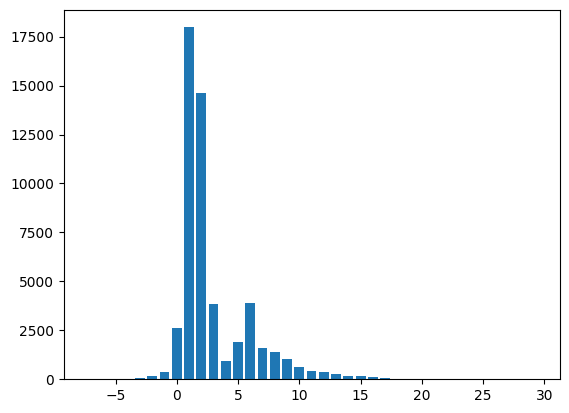

In [43]:
total_points = np.unique(y_train, return_counts=True)
print("Points:",total_points[0])
print("Counts:",total_points[1])
plt.bar(total_points[0],total_points[1])

# Normalizing the data to make sure no one variable pulls to much on the prediction. (Do We Need to Normalize)

In [44]:
# Normalizing the features

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_test)
# X_train.fillna(0) 
# X_test.fillna(0) 
print(X_train)


[[-0.68961021 -0.28272653 -0.48361394 ...  3.71151748  2.04771358
  -0.47434288]
 [-0.4654639  -0.28272653 -0.48361394 ... -0.21587051 -0.42566981
  -0.47434288]
 [ 0.87655598 -0.28272653 -0.48361394 ...  0.95398974  0.90151152
   2.10817965]
 ...
 [-0.94954916 -0.28272653 -0.48361394 ... -0.21587051 -0.42566981
  -0.47434288]
 [-1.09190316 -0.28272653  2.25143742 ... -0.21587051 -0.42566981
  -0.47434288]
 [ 0.51822129 -0.28272653 -0.48361394 ... -0.21587051 -0.42566981
  -0.47434288]]
[[ 0.37518683 -0.28272653 -0.48361394 ... -0.21587051 -0.42566981
  -0.47434288]
 [ 0.6130786  -0.28272653 -0.48361394 ... -0.21587051 -0.42566981
  -0.47434288]
 [-1.43377051 -0.28272653  1.83066029 ... -0.21587051 -0.42566981
  -0.47434288]
 ...
 [ 1.20304475 -0.28272653  0.72612032 ... -0.21587051 -0.42566981
  -0.47434288]
 [ 0.64601327 -0.28272653  0.51573175 ... -0.21587051 -0.42566981
  -0.47434288]
 [-0.40884892 -0.28272653 -0.48361394 ... -0.21587051 -0.42566981
  -0.47434288]]


# Fitting the data to a Multiple Linear Regression Model

In [45]:
# Fitting the multiple linear regresion to the training set
mlr_obj = LinearRegression()
mlr_obj.fit(X_train, y_train)


num_culmn_raw  = X_train[0,:]

print("The weight parameters are:")

#sort and print the weight parameters for each column
copy_of_coef=list(mlr_obj.coef_[0])
list_of_coeff=list(mlr_obj.coef_[0])
copy_of_coef.sort(reverse=True)

for idx, coeff in enumerate(copy_of_coef):
    index=list_of_coeff.index(copy_of_coef[idx])
    print("({}) {}: {}".format(idx, dataset_test.columns[index], copy_of_coef[idx] ))

mlr_y_pred = mlr_obj.predict(X_test)


The weight parameters are:
(0) goals_scored: 1.1035218973132472
(1) threat: 1.0962643698174306
(2) bps: 0.9963969276460521
(3) bonus: 0.7601608284399686
(4) creativity: 0.7279420908760393
(5) assists: 0.7007064613965645
(6) clean_sheets: 0.642414782791933
(7) influence: 0.6073438427544472
(8) attempted_passes: 0.2523265527097454
(9) minutes: 0.2509605679186926
(10) saves: 0.15101985842958698
(11) penalties_saved: 0.1453051937714161
(12) tackled: 0.08828965454540146
(13) xP: 0.07468368465041811
(14) big_chances_missed: 0.030153264898878
(15) fouls: 0.02858499149285542
(16) clearances_blocks_interceptions: 0.028310388318265572
(17) expected_goal_involvements: 0.027455011148429465
(18) expected_goals_conceded: 0.022027189400318614
(19) key_passes: 0.01675107387014071
(20) fixture: 0.015675631139466628
(21) offside: 0.007242511839627458
(22) errors_leading_to_goal_attempt: 0.00520599696485371
(23) open_play_crosses: 0.004419525664446205
(24) team_h_score: 0.002495690671404746
(25) target_m

# Calculate the Mean Squared Error for the model

In [46]:
mlr_mse=metrics.mean_squared_error(y_test, mlr_y_pred)
print("Mean Squared Error for MLR:", mlr_mse)

Mean Squared Error for MLR: 0.565125874495136


# Using backwards elimination to trim the data

In [47]:
def backwardElimination(x, sl):
    
    numVars = len(x[0])
    for i in range(0, numVars):
        
        obj_OLS = sm.OLS(endog = y, exog = x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)

        if maxVar > sl:
            
            for j in range(0, numVars - i):
                
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    dataset_test.drop([dataset_test.columns[j]], axis=1, inplace=True)
                    print("Droped column: ",j)
                    
    obj_OLS.summary()
    return x


X = X.astype(float)
SL = 0.05
X_sig = X[:,:]
X_Modeled = backwardElimination(X_sig, SL)

Droped column:  26
Droped column:  34
Droped column:  0
Droped column:  13
Droped column:  21
Droped column:  12


# Now run the trimed data with a linear regression model

In [48]:
# Split the data
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(
    X_Modeled, y, test_size = 0.3)

# Normalizing the features
sc_X = StandardScaler()
X_sig_train = sc_X.fit_transform(X_sig_train)
X_sig_test = sc_X.transform(X_sig_test)

mlr_bw_obj = LinearRegression()
mlr_bw_obj.fit(X_sig_train, y_sig_train)

y_sig_pred = mlr_bw_obj.predict(X_sig_test)

num_culmn_sig  = X_Modeled[0,:]

print("The weight parameters are:")

#sort and print the weight parameters for each column

copy_of_coef=list(mlr_bw_obj.coef_[0])
list_of_coeff=list(mlr_bw_obj.coef_[0])
copy_of_coef.sort(reverse=True)

for idx, coeff in enumerate(copy_of_coef):
    index=list_of_coeff.index(copy_of_coef[idx])
    print("({}) {}: {}".format(idx, dataset_test.columns[index], copy_of_coef[idx] ))
#print("Mean Squared Error for MLR and Backward Elimination:", metrics.mean_squared_error(y_sig_test, y_sig_pred))

The weight parameters are:
(0) threat: 1.1849577461312304
(1) goals_scored: 1.0916608360557554
(2) bps: 0.9998767110347315
(3) creativity: 0.805537090868645
(4) bonus: 0.7650334140594774
(5) assists: 0.6841078407070337
(6) influence: 0.6807653452062981
(7) clean_sheets: 0.6401485297230315
(8) attempted_passes: 0.275247113779152
(9) minutes: 0.25180943379295484
(10) saves: 0.14641268030976481
(11) penalties_saved: 0.14187504693431913
(12) tackled: 0.0970547729064771
(13) xP: 0.07835726308284108
(14) expected_goal_involvements: 0.054150039437187394
(15) clearances_blocks_interceptions: 0.03198790883324472
(16) big_chances_missed: 0.03189755838635011
(17) fouls: 0.02587139381587716
(18) key_passes: 0.02286887085592315
(19) expected_goals_conceded: 0.021909658882502785
(20) offside: 0.005855997810211788
(21) was_home: 0.0032323752064447597
(22) team_h_score: 0.0018164865801686136
(23) team_a_score: 0.0006687726839192804
(24) GW: -0.001899340481556193
(25) round: -0.0018993404815683325
(26)

# MLR and Backward Elimination Mean Squared Error

In [49]:
mlr_be_mse=metrics.mean_squared_error(y_sig_test, y_sig_pred)
print("Mean Squared Error for MLR and Backward Elimination:", mlr_be_mse)

Mean Squared Error for MLR and Backward Elimination: 0.5707587443371739


# Examine a Decison Tree regression

In [50]:
dtr_obj = DecisionTreeRegressor()
dtr_obj.fit(X_train, y_train)

dtr_y_pred = dtr_obj.predict(X_test)

dtr_mse=metrics.mean_squared_error(y_test, dtr_y_pred)
print("Mean Squared Error for Decision Tree:", dtr_mse)

Mean Squared Error for Decision Tree: 0.40891550232867596


# Examine a Random Forrest model

In [51]:
num_tree = []
msqe = []
x_axis=[]

for n in range (10, 301, 10):
    
    num_tree.append(n)
    
    randf_obj = RandomForestRegressor(n_estimators=n)
    randf_obj.fit(X_train, y_train)
    
    randf_y_pred = randf_obj.predict(X_test)
    
    mean_sqr_eror = metrics.mean_squared_error(y_test, 
                                               randf_y_pred)
    x_axis.append(n)
    msqe.append(mean_sqr_eror)

plt.title('Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.plot(x_axis,msqe)
print('Lowest testing error =', min(msqe))
print('Associated number of trees (n_estimator) =', 
      num_tree[msqe.index(min(msqe))])

/Users/suyash/Documents/dev/openAI/.env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/suyash/Documents/dev/openAI/.env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/suyash/Documents/dev/openAI/.env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/suyash/Documents/dev/openAI/.env/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column

In [ ]:
print('Lowest testing error =', min(msqe))
print('Associated number of trees (n_estimator) =', 
      num_tree[msqe.index(min(msqe))])

Lowest testing error = 0.0021611796383378687
Associated number of trees (n_estimator) = 130


# PCA model examination

Lowest testing error = 0.007795964278223926
Associated number of components (n_components) = 39


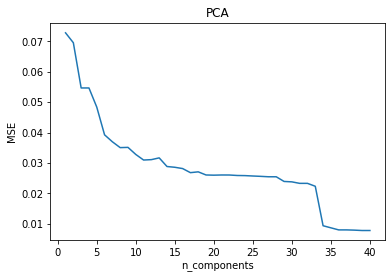

In [ ]:
num_tree_pca = []
pca_error = []
x_axis=[]

for n in range(1, len(num_culmn_raw)):
    num_tree_pca.append(n)
    
    pca_obj = PCA(n_components=n)
    X_PCA_train = pca_obj.fit_transform(X_train)
    X_PCA_test = pca_obj.transform(X_test)
    components_variance = pca_obj.explained_variance_ratio_

    # Fit a linear regression to the training set
    mlr_pca_obj = LinearRegression()
    mlr_pca_obj.fit(X_PCA_train, y_train)

    y_mlr_pca_pred = mlr_pca_obj.predict(X_PCA_test)
    x_axis.append(n)

    pca_error.append(metrics.mean_squared_error(y_test, y_mlr_pca_pred))

plt.title('PCA')
plt.xlabel('n_components')
plt.ylabel('MSE')
plt.plot(x_axis,pca_error)    
print('Lowest testing error =', min(pca_error))
print('Associated number of components (n_components) =', 
      num_tree_pca[pca_error.index(min(pca_error))])

# Visualize MSE results of computed models

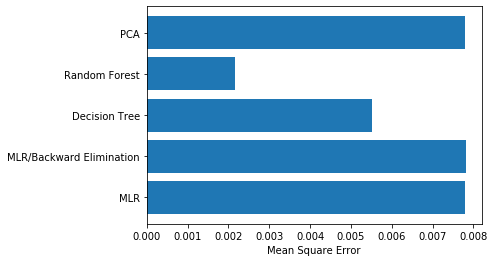

In [ ]:
plot_y=[1,2,3,4,5]
plot_x=[mlr_mse,mlr_be_mse,dtr_mse,min(msqe),min(pca_error)]

plot_labels=["MLR","MLR/Backward Elimination","Decision Tree","Random Forest","PCA"]
plt.barh(plot_y, plot_x, align='center')
plt.yticks(plot_y, plot_labels)
plt.xlabel("Mean Square Error")
plt.show()

# K-Fold Tests

In [ ]:
#initialize for plot
plot_x_mean=[]
plot_x_std=[]

# Multiple Linear Regression Raw
modelAccuracies = cross_val_score(estimator=mlr_obj, X=X_train, y=y_train, cv=10)
plot_x_mean.append(modelAccuracies.mean())
plot_x_std.append(modelAccuracies.std())
print("MLR Mean:", modelAccuracies.mean())
print("MLR Standard Deviation:", modelAccuracies.std())

print()

# Multilinear Regression with Backward Elimination
modelAccuracies = cross_val_score(estimator=mlr_bw_obj, X=X_train, y=y_train, cv=10)
plot_x_mean.append(modelAccuracies.mean())
plot_x_std.append(modelAccuracies.std())
print("MLR/Backward Elimination Mean:", modelAccuracies.mean())
print("MLR/Backward Elimination Deviation:", modelAccuracies.std())

print()

# Decision Tree Model
modelAccuracies = cross_val_score(estimator=dtr_obj, X=X_train, y=y_train, cv=10)
plot_x_mean.append(modelAccuracies.mean())
plot_x_std.append(modelAccuracies.std())
print("Decission Tree Mean:", modelAccuracies.mean())
print("Decission Tree Deviation:", modelAccuracies.std())

print()

# Random Forest Model
randf_obj = RandomForestRegressor(n_estimators=num_tree[msqe.index(min(msqe))])
modelAccuracies = cross_val_score(estimator=randf_obj, X=X_train, y=y_train, cv=10)
plot_x_mean.append(modelAccuracies.mean())
plot_x_std.append(modelAccuracies.std())
print("Random Forest Mean:", modelAccuracies.mean())
print("Random Forest Standard Deviation:", modelAccuracies.std())

print()

# PCA Model
modelAccuracies = cross_val_score(estimator=mlr_pca_obj, X=X_train, y=y_train, cv=5)
plot_x_mean.append(modelAccuracies.mean())
plot_x_std.append(modelAccuracies.std())
print("MLR/PCA Mean:", modelAccuracies.mean())
print("MLR/PCA Standard Deviation:", modelAccuracies.std())

MLR Mean: 0.9289505739138914
MLR Standard Deviation: 0.006570637340117094

MLR/Backward Elimination Mean: 0.9289505739138914
MLR/Backward Elimination Deviation: 0.006570637340117094

Decission Tree Mean: 0.9503118324905622
Decission Tree Deviation: 0.008024807359559434



/Users/sshrest/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sshrest/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sshrest/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sshrest/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_valida

Random Forest Mean: 0.9746462139828489
Random Forest Standard Deviation: 0.0060389558720899

MLR/PCA Mean: 0.9291971524931553
MLR/PCA Standard Deviation: 0.004336414184795903


# Plot model accuracies Means from K folds test

[0.007790253809881696, 0.00781246847752472, 0.005519583908289991, 0.0021611796383378687, 0.007795964278223926]


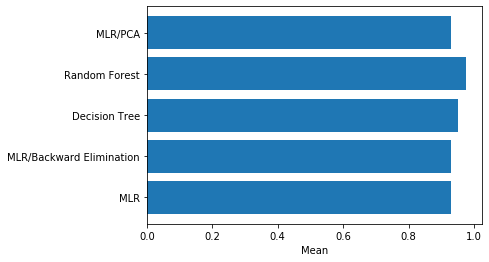

In [ ]:
plot_y=[1,2,3,4,5]
print(plot_x)
plot_labels=["MLR","MLR/Backward Elimination","Decision Tree","Random Forest","MLR/PCA"]
plt.barh(plot_y, plot_x_mean, align='center')
plt.yticks(plot_y, plot_labels)
plt.xlabel("Mean")
plt.show()

# Plot model accuracies Standard Deviation from K folds test

[0.007790253809881696, 0.00781246847752472, 0.005519583908289991, 0.0021611796383378687, 0.007795964278223926]


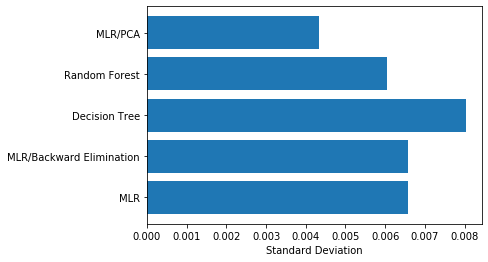

In [ ]:
plot_y=[1,2,3,4,5]
print(plot_x)
plot_labels=["MLR","MLR/Backward Elimination","Decision Tree","Random Forest","MLR/PCA"]
plt.barh(plot_y, plot_x_std, align='center')
plt.yticks(plot_y, plot_labels)
plt.xlabel("Standard Deviation")
plt.show()